### Suleimenova Madina 21B031185

### Data Mining FINAL

In [1]:
# All libs that I used in this project
import pandas as pd
# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# feature selection
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
# First of all we need to load our dataset
data = pd.read_excel('C:\\Users\\sulej\\OneDrive\\Рабочий стол\\7 semester\\Data Mining\\Online Retail.xlsx')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [4]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Preprocessing Stage

In [5]:
# Now lets work with missing values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# As we can see most of the NA data is in CustomerID column 
# Drop rows with missing 'Description' and 'CustomerID'
data = data.dropna(subset=['Description', 'CustomerID'])

# Fill remaining NaN values 
data.fillna(method='ffill', inplace=True)

In [7]:
# Lets check our dataset now
print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
# Now we need to encode some categorical variables
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])

In [9]:
# And also we need to standartizize our numerical data
standard_scaler = StandardScaler()
data[['Quantity', 'UnitPrice']] = standard_scaler.fit_transform(data[['Quantity','UnitPrice']])

### Exploration and Visualization stage

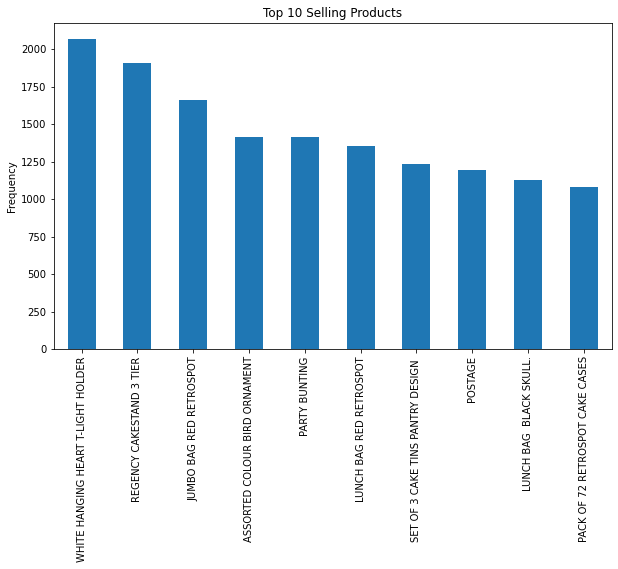

In [10]:
# Before making any analysis Lets see how the visualization of our data looks like

# For example lets see what are out top-selling products
product_counts = data['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title("Top 10 Selling Products")
plt.ylabel("Frequency")
plt.show()

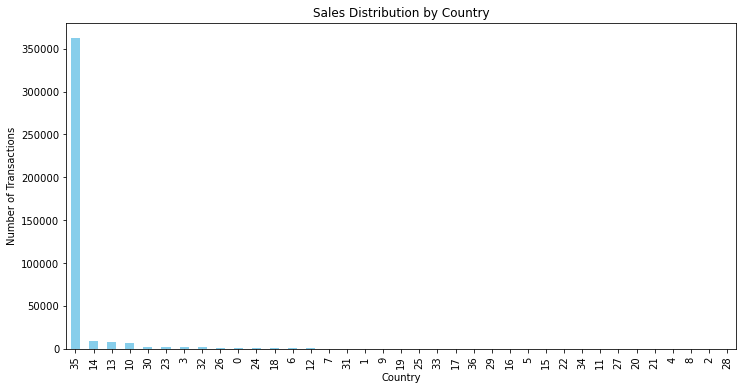

In [11]:
# Visualize sales distribution by country
country_sales = data['Country'].value_counts()
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title("Sales Distribution by Country")
plt.ylabel("Number of Transactions")
plt.xlabel("Country")
plt.show()

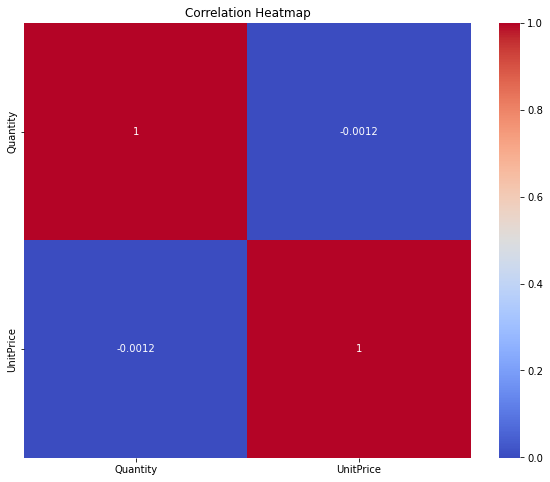

In [12]:
# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Quantity', 'UnitPrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

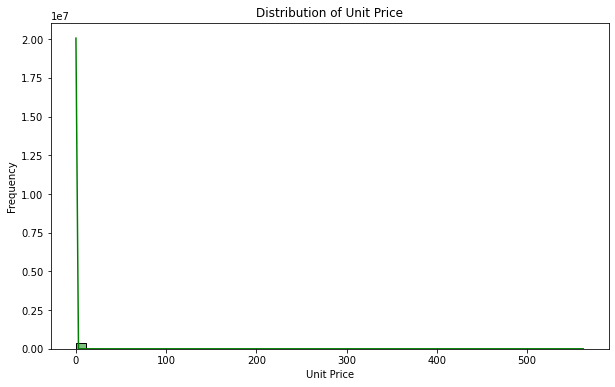

In [13]:
# Distribution of unit price
plt.figure(figsize=(10, 6))
sns.histplot(data['UnitPrice'], bins=50, kde=True, color='green')
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

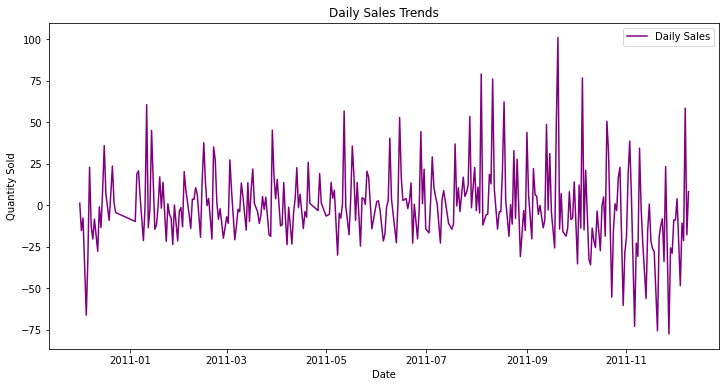

In [14]:
# Time series visualization of sales trends
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label="Daily Sales", color='purple')
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.legend()
plt.show()

### Feature Selection and Dimensionality Reduction

In [10]:
# Handle non-numerical data before feature selection
X = data.drop(['InvoiceNo', 'Description', 'CustomerID', 'InvoiceDate'], axis=1)
y = data['Country']

# Ensure all features are numerical
X = pd.get_dummies(X, drop_first=True)

In [11]:
print(X.dtypes)

Quantity           float64
UnitPrice          float64
Country              int32
StockCode_10080      uint8
StockCode_10120      uint8
                    ...   
StockCode_D          uint8
StockCode_DOT        uint8
StockCode_M          uint8
StockCode_PADS       uint8
StockCode_POST       uint8
Length: 3686, dtype: object


In [12]:
# Sample the data to reduce size
sampled_data = data.sample(frac=0.1, random_state=42)  # Sample 10% of data
X_sampled = sampled_data.drop(['InvoiceNo', 'Description', 'CustomerID', 'InvoiceDate', 'Country'], axis=1)
y_sampled = sampled_data['Country']

In [13]:
# Ensure all features in X_sampled are numeric
X_sampled_numeric = pd.get_dummies(X_sampled, drop_first=True)

In [14]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled_numeric)

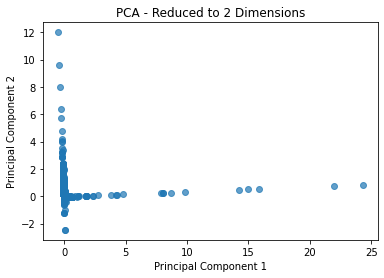

In [15]:
# Visualizing the PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title("PCA - Reduced to 2 Dimensions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [16]:
# Convert the target variable to a pandas Series to retain indices
y = pd.Series(label_encoder.fit_transform(data['Country']), index=data.index)

# Sampling a subset of the data
X_sampled = X.sample(frac=0.1, random_state=42)  # Use 10% of the data
y_sampled = y.loc[X_sampled.index]  # Align indices with sampled X

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

### Classification Techniques

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample the data to reduce size (if not already done)
sampled_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data
X_sampled = sampled_data.drop(['InvoiceNo', 'Description', 'CustomerID', 'InvoiceDate', 'Country'], axis=1)
y_sampled = sampled_data['Country']

# Ensure all features are numerical
X_sampled = pd.get_dummies(X_sampled, drop_first=True)

# Split data into training and testing sets (with smaller data)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

# Logistic Regression with optimization for speed
log_reg = LogisticRegression(max_iter=100, solver='liblinear', n_jobs=-1)  # Reduced max_iter and enabled parallelism
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

C:\Users\sulej\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


Logistic Regression Accuracy: 0.8911102007374027
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        58
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00       232
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        25
          13       0.13      0.02      0.03       255
          14       0.00      0.00      0.00       251
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         9
          17       0.00      0.0

C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample the data to reduce size (if not already done)
sampled_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data
X_sampled = sampled_data.drop(['InvoiceNo', 'Description', 'CustomerID', 'InvoiceDate', 'Country'], axis=1)
y_sampled = sampled_data['Country']

# Ensure all features are numerical
X_sampled = pd.get_dummies(X_sampled, drop_first=True)

# Split data into training and testing sets (with smaller data)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

# Decision Tree with optimization for speed
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)  # Limited max depth and additional constraints
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_tree = decision_tree.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.8908643998361327
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        58
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        15
          10       0.67      0.01      0.02       232
          11       0.00      0.00      0.00         5
          12       0.14      0.04      0.06        25
          13       0.16      0.02      0.03       255
          14       0.08      0.00      0.01       251
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         9
          17       0.00      0.00     

C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample the data to reduce size (if not already done)
sampled_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data
X_sampled = sampled_data.drop(['InvoiceNo', 'Description', 'CustomerID', 'InvoiceDate', 'Country'], axis=1)
y_sampled = sampled_data['Country']

# Ensure all features are numerical
X_sampled = pd.get_dummies(X_sampled, drop_first=True)

# Split data into training and testing sets (with smaller data)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

# Random Forest with optimization for speed
rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=10, n_jobs=-1)  # Reduced n_estimators, limited max_depth, and enabled parallelism
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.891519868906186
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        58
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00       232
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00       255
          14       0.00      0.00      0.00       251
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         9
          17       0.00      0.00      

C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sulej\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Logistic Regression Accuracy: 0.8907824662023761


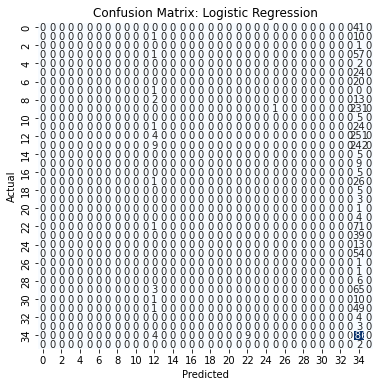

In [27]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

Decision Tree Accuracy: 0.8598934862761164


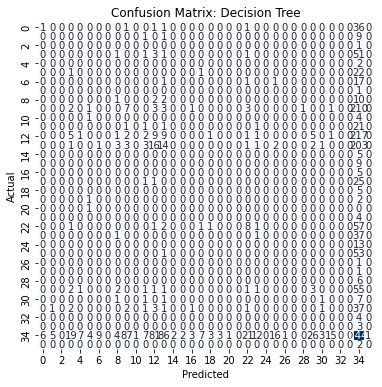

In [28]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")

Random Forest Accuracy: 0.8752970094223679


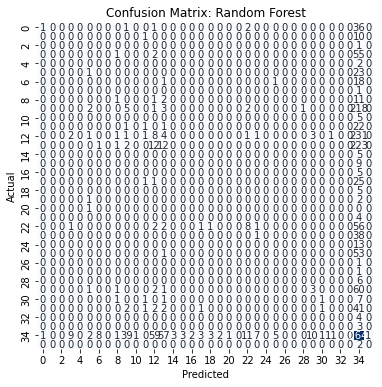

In [29]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

### Section 5: Advanced Classification

In [ ]:
# # Section 5: Advanced Classification
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Random Forest
# rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)  # Reduce trees, limit depth, use parallel processing
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# # Support Vector Machine 
# svc = SVC(kernel='linear', C=1.0, max_iter=1000, random_state=42)  # Use linear kernel, smaller C for faster model
# svc.fit(X_train, y_train)
# y_pred_svc = svc.predict(X_test)
# print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))


Random Forest Accuracy: 0.891519868906186


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
# Random Forest 
rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)  # Reduced trees, limited depth, parallel processing
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [24]:
# # Support Vector Machine 
# svc = SVC(kernel='linear', C=1.0, max_iter=1000, random_state=42)  # Use linear kernel, smaller C for faster model
# svc.fit(X_train, y_train)
# y_pred_svc = svc.predict(X_test)
# svm_accuracy = accuracy_score(y_test, y_pred_svc)


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Sample a smaller portion of the data for faster processing
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Support Vector Machine with faster training options
svc = SVC(kernel='linear', C=0.5, max_iter=500, random_state=42, tol=1e-3)  # Tuning C and max_iter for speed
svc.fit(X_train_small, y_train_small)

# Prediction
y_pred_svc = svc.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svc)
print("SVM Accuracy:", svm_accuracy)


C:\Users\sulej\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy: 0.9953297828758706


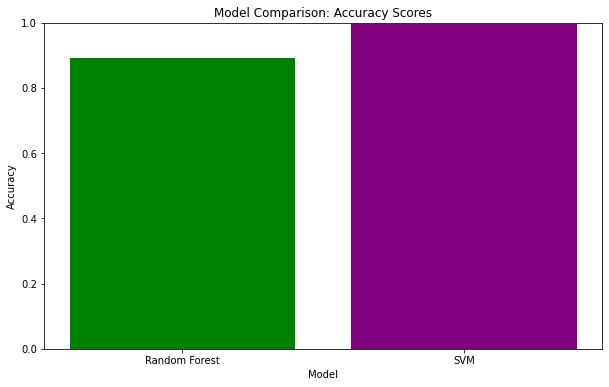

In [27]:
# Plotting the results for all four models
models = ['Random Forest', 'SVM']
accuracies = [rf_accuracy, svm_accuracy]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['green', 'purple'])
plt.title('Model Comparison: Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limit from 0 to 1
plt.show()

### Section 6: Clustering Techniques

In [28]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

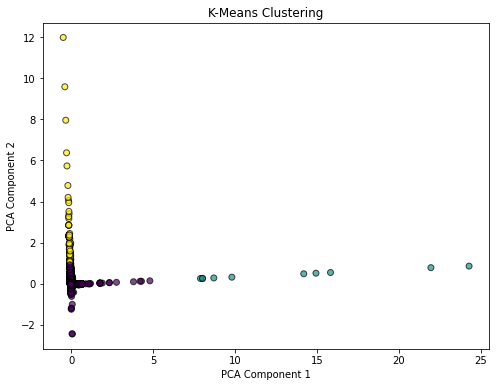

In [29]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)  # Set n_init and max_iter for faster convergence
kmeans_clusters = kmeans.fit_predict(X_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

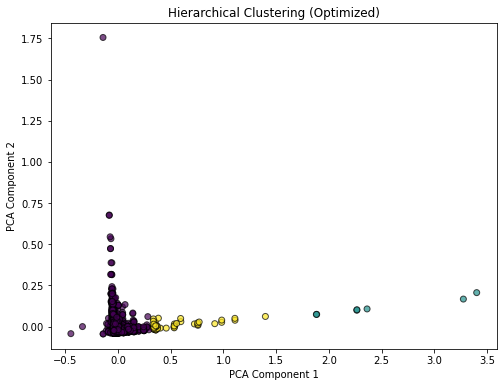

In [33]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Example: Sampling and reducing dimensionality
X_sampled = X_pca[:len(X_pca)//10]  # Taking a 10% sample

# Check number of features in the sampled data
n_features = X_sampled.shape[1]

# Reduce dimensionality based on available features
n_components = min(n_features, 2)  # Set max components to 2 for 2D visualization

# Apply PCA for dimensionality reduction
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_sampled)

# Hierarchical Clustering with sample
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_clusters = hierarchical.fit_predict(X_pca_reduced)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=hier_clusters, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.title("Hierarchical Clustering (Optimized)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


### Section 7: Advanced Clustering Techniques

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

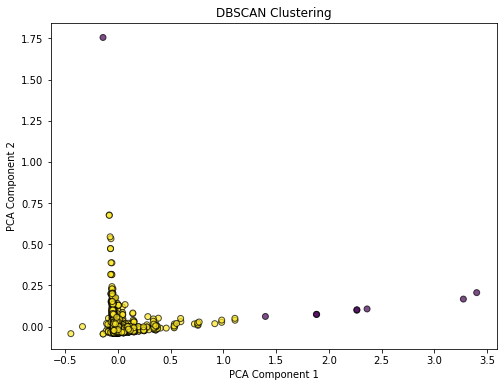

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Sample 10% of the data
X_sampled = X_pca[:len(X_pca)//10]

# Apply PCA to reduce dimensions to 2 for better visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_sampled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10, n_jobs=-1)
dbscan_clusters = dbscan.fit_predict(X_reduced)

# Plotting DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_clusters, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


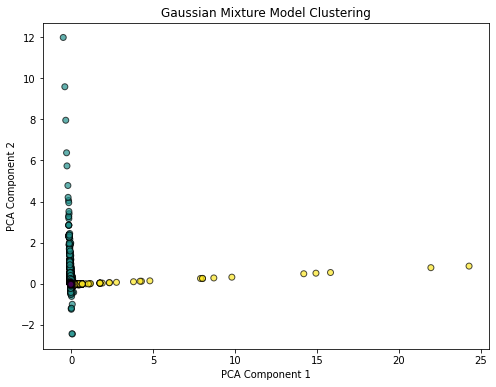

In [38]:
# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='full', max_iter=200, n_init=5)  # Reduced max_iter and n_init for faster fitting
gmm_clusters = gmm.fit_predict(X_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_clusters, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

### Section 8: Association Rule Mining

In [20]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Example: Create a basket for association rule mining
# Sample the data to reduce its size for faster processing
sampled_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Prepare the basket with the transaction data
basket = (sampled_data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert quantities to binary (1 if bought, 0 if not)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets with a reduced support threshold for faster computation
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)  # Lowered support to 0.01 for faster results

# Generate association rules with optimized thresholds
# Pass the correct parameter for frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Display the association rules
print(rules.head())


C:\Users\sulej\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

### Section 9: Anomaly Detection

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

In [22]:
# Sample the data to reduce size (if not already done)
sampled_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data
X_sampled = sampled_data.drop(['InvoiceNo', 'Description', 'CustomerID', 'InvoiceDate', 'Country'], axis=1)

# Ensure all features are numerical (if not already done)
X_sampled = pd.get_dummies(X_sampled, drop_first=True)

# Isolation Forest
iso_forest = IsolationForest(n_estimators=50, max_samples=0.1, contamination=0.05, random_state=42)
anomalies_iso = iso_forest.fit_predict(X_sampled)

In [23]:
# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, n_jobs=-1)  # n_jobs=-1 for parallel computation
anomalies_lof = lof.fit_predict(X_sampled)

# Convert results to 1 for inliers and -1 for outliers
anomalies_iso = [1 if x == 1 else -1 for x in anomalies_iso]
anomalies_lof = [1 if x == 1 else -1 for x in anomalies_lof]

# Display a few results for both models
print("Isolation Forest Anomalies:", anomalies_iso[:10])
print("Local Outlier Factor Anomalies:", anomalies_lof[:10])

Isolation Forest Anomalies: [1, 1, 1, 1, 1, 1, 1, -1, 1, 1]
Local Outlier Factor Anomalies: [1, 1, 1, 1, 1, 1, 1, 1, -1, 1]


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

# Sample the data to reduce size (if not already done)
sampled_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data
X_sampled = sampled_data.drop(['InvoiceNo', 'Description', 'CustomerID', 'InvoiceDate', 'Country'], axis=1)

# Ensure all features are numerical (if not already done)
X_sampled = pd.get_dummies(X_sampled, drop_first=True)

# Isolation Forest
iso_forest = IsolationForest(n_estimators=50, max_samples=0.1, contamination=0.05, random_state=42)
anomalies_iso = iso_forest.fit_predict(X_sampled)
anomalies_iso = [1 if x == 1 else -1 for x in anomalies_iso]  # Convert 1 for inliers and -1 for outliers

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, n_jobs=-1)  # n_jobs=-1 for parallel computation
anomalies_lof = lof.fit_predict(X_sampled)
anomalies_lof = [1 if x == 1 else -1 for x in anomalies_lof]  # Convert 1 for inliers and -1 for outliers

# Evaluation: Compare the number of anomalies detected
print("Number of anomalies detected by Isolation Forest:", sum(anomalies_iso == -1))
print("Number of anomalies detected by LOF:", sum(anomalies_lof == -1))

# Visualization 1: Scatter plot for Isolation Forest anomalies
plt.figure(figsize=(12, 6))

# Plot for Isolation Forest
plt.subplot(1, 2, 1)
plt.scatter(X_sampled.iloc[:, 0], X_sampled.iloc[:, 1], c=anomalies_iso, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Isolation Forest Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot for Local Outlier Factor
plt.subplot(1, 2, 2)
plt.scatter(X_sampled.iloc[:, 0], X_sampled.iloc[:, 1], c=anomalies_lof, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Local Outlier Factor Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Evaluation Metrics (if true labels were available, you could use this)
# print(classification_report(true_labels, anomalies_iso))  # true_labels should be available if known
# print(classification_report(true_labels, anomalies_lof))  # true_labels should be available if known


TypeError: 'bool' object is not iterable

In [29]:
# Evaluation: Compare the number of anomalies detected
print("Number of anomalies detected by Isolation Forest:", sum([1 for x in anomalies_iso if x == -1]))
print("Number of anomalies detected by LOF:", sum([1 for x in anomalies_lof if x == -1]))


Number of anomalies detected by Isolation Forest: 2025
Number of anomalies detected by LOF: 2032


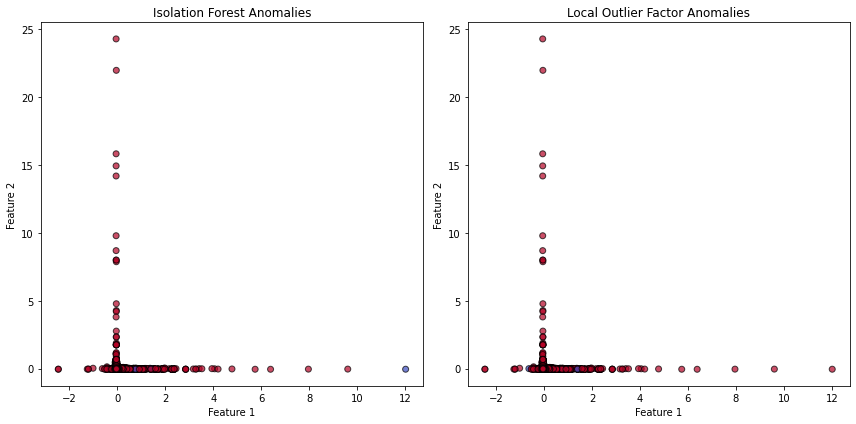

In [30]:
import matplotlib.pyplot as plt

# Visualization 1: Scatter plot for Isolation Forest anomalies
plt.figure(figsize=(12, 6))

# Plot for Isolation Forest
plt.subplot(1, 2, 1)
plt.scatter(X_sampled.iloc[:, 0], X_sampled.iloc[:, 1], c=anomalies_iso, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Isolation Forest Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot for Local Outlier Factor
plt.subplot(1, 2, 2)
plt.scatter(X_sampled.iloc[:, 0], X_sampled.iloc[:, 1], c=anomalies_lof, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Local Outlier Factor Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


### Section 10: Time Series Analysis

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Example: Group data by date and analyze trends (use sampled data for faster processing)
time_series_data = data.groupby('InvoiceDate')['Quantity'].sum()

# Resample to monthly data for faster analysis (adjust as needed)
time_series_data = time_series_data.resample('M').sum()

# Optional: Downsample the data to a smaller time window (e.g., use only the last 6 months for testing)
time_series_data = time_series_data.tail(6)

# Fit ARIMA model (simplified order for faster fitting)
arima_model = ARIMA(time_series_data, order=(1, 1, 1))  # Adjust p, d, q for speed
arima_result = arima_model.fit()

# Print summary (optional, you can comment this if you want to speed up further)
print(arima_result.summary())

# Forecast (using fewer steps for speed)
forecast = arima_result.forecast(steps=5)  # Reduce steps for faster predictions
print(forecast)

C:\Users\sulej\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood         -1766089476.615
Date:                Sat, 14 Dec 2024   AIC                     3532178959.230
Time:                        16:30:56   BIC                     3532178958.058
Sample:                    07-31-2011   HQIC                    3532178956.085
                         - 12-31-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7770   1.73e-08  -4.49e+07      0.000      -0.777      -0.777
ma.L1       1.366e-07   1.11e-08     12.353      0.000    1.15e-07    1.58e-07
sigma2         0.0002   9.77e-13   1.55e+08      0.0

### Text Mining and NLP

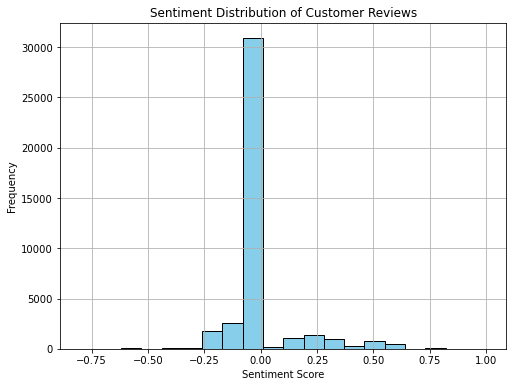

                            Description  Sentiment
47912                DOORMAT FAIRY CAKE        0.0
342630    GLASS APOTHECARY BOTTLE TONIC        0.0
288183      GLASS HEART T-LIGHT HOLDER         0.0
325368       LUNCH BAG SPACEBOY DESIGN         0.0
331450  PACK OF 72 RETROSPOT CAKE CASES        0.0


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load your dataset (assuming it's in a DataFrame called 'data')
# For faster processing, we'll sample the data (e.g., use 10% of the data)
sampled_data = data.sample(frac=0.1, random_state=42)

# Select relevant text column for analysis (e.g., 'Description')
text_data = sampled_data['Description'].dropna()

# Tokenization: Using CountVectorizer to convert text into tokens (word counts)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Limit features for faster processing
X = vectorizer.fit_transform(text_data)

# Sentiment Analysis: Analyze sentiment for each description using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply sentiment analysis
sampled_data['Sentiment'] = sampled_data['Description'].apply(lambda x: get_sentiment(str(x)))

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sampled_data['Sentiment'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of Customer Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Display a sample of sentiment values
print(sampled_data[['Description', 'Sentiment']].head())
